In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Load your data set
df = pd.read_csv('mobile_price_1.csv')

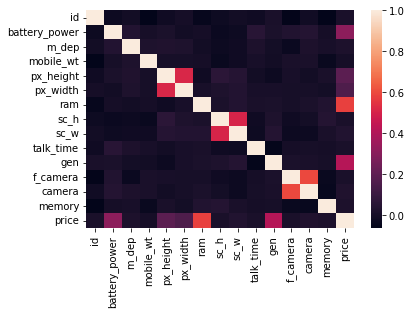

In [4]:
# Calculate the pairwise correlations
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [5]:
### 2) we can see that the features that are correlated with the device price are battery power, generation, px_height and px_width, and ram 

In [6]:
### 3) 

In [7]:
### 4) 

In [8]:
plot_data = df[['battery_power', 'gen', 'ram', 'px_width', 'px_height','price']]

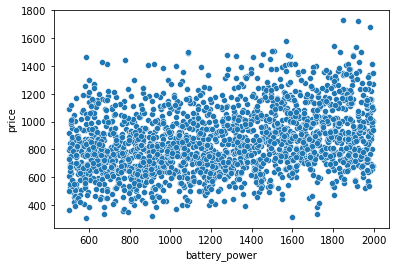

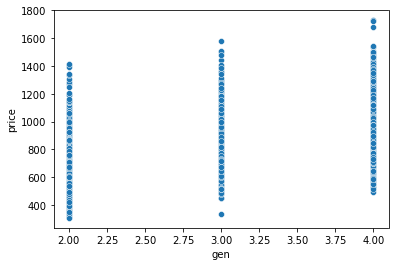

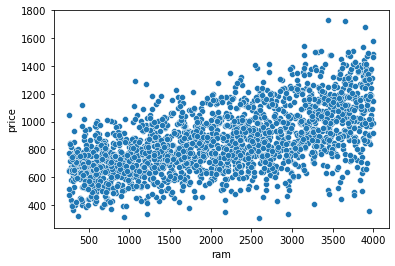

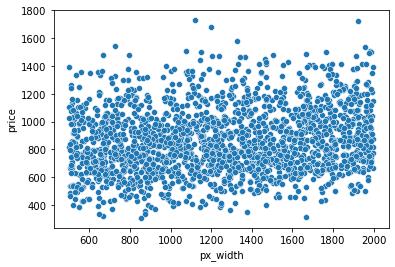

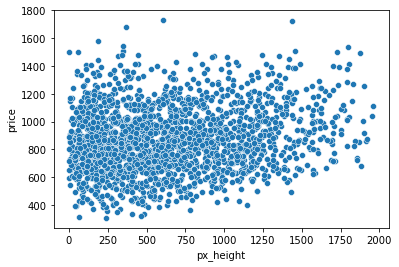

In [9]:
features = ['battery_power', 'gen' , 'ram' , 'px_width' , 'px_height']
# Iterate over the list of features
for feature in features:
  # Create a scatterplot of the feature and the price
  sns.scatterplot(x=feature, y='price', data=plot_data)
  plt.show()

In [10]:
###task 2 ordinal features are - speed, cores sim

# Select the ordinal feature speed
ordinal_feature_speed = 'speed'

# Create a dictionary mapping the original values to the ordered values
ordinal_mapping_speed = {'low': 1, 'medium': 2, 'high': 3}

# Add a new column to the dataframe with the ordered values
df[ordinal_feature_speed + '_ord'] = df[ordinal_feature_speed].apply(lambda x: ordinal_mapping_speed[x])

# Select the ordinal feature speed
ordinal_feature_cores = 'cores'

# Create a dictionary mapping the original values to the ordered values
ordinal_mapping_cores = {'single': 1, 'dual': 2, 'triple' : 3, 'quad' : 4 , 'penta' : 5, 'hexa': 6, 'hepta':7 , 'octa' : 8}

# Add a new column to the dataframe with the ordered values
df[ordinal_feature_cores + '_ord'] = df[ordinal_feature_cores].apply(lambda x: ordinal_mapping_cores[x])

# Select the ordinal feature speed
ordinal_feature_sim = 'sim'

# Create a dictionary mapping the original values to the ordered values
ordinal_mapping_sim = {'Single': 1, 'Dual': 2}

# Add a new column to the dataframe with the ordered values
df[ordinal_feature_sim + '_ord'] = df[ordinal_feature_sim].apply(lambda x: ordinal_mapping_sim[x])





In [11]:
df['cores'].unique()

array(['dual', 'triple', 'penta', 'hexa', 'single', 'octa', 'quad',
       'hepta'], dtype=object)

In [12]:
###nominal features :
### bluetooth, gen, cores, sim, f_camera, camera
### memory, screen, wifi

In [13]:
# Select the nominal feature
nominal_feature_bluetooth = 'bluetooth'

# Add a new column to the dataframe with binary values
df[nominal_feature_bluetooth + '_bin'] = df[nominal_feature_bluetooth].apply(lambda x: 1 if x == 'Yes' else 0)

In [14]:
# Perform one-hot encoding of the nominal feature
one_hot_gen = pd.get_dummies(df['gen'], prefix='gen')

# Add the one-hot encoded columns to the dataframe
df = pd.concat([df, one_hot_gen], axis=1)

In [15]:
# Perform one-hot encoding of the nominal feature
one_hot_cores = pd.get_dummies(df['cores'], prefix='cores')

# Add the one-hot encoded columns to the dataframe
df = pd.concat([df, one_hot_cores], axis=1)

In [16]:
# Perform one-hot encoding of the nominal feature
one_hot_sim = pd.get_dummies(df['sim'], prefix='sim')

# Add the one-hot encoded columns to the dataframe
df = pd.concat([df, one_hot_sim], axis=1)

In [17]:
# Perform one-hot encoding of the nominal feature
one_hot_screen = pd.get_dummies(df['screen'], prefix='screen')

# Add the one-hot encoded columns to the dataframe
df = pd.concat([df, one_hot_screen], axis=1)

In [19]:
# Perform one-hot encoding of the nominal feature
one_hot_wifi = pd.get_dummies(df['wifi'], prefix='wifi')

# Add the one-hot encoded columns to the dataframe
df = pd.concat([df, one_hot_wifi], axis=1)

In [20]:
df

,id,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,...,cores_triple,sim_Dual,sim_Single,screen_LCD,screen_Touch,wifi_a,wifi_b,wifi_g,wifi_n,wifi_none
0,0,842,0.6,188,20,756,2549,9,7,19,...,0,0,1,1,0,0,0,1,0,0
1,1,1021,0.7,136,905,1988,2631,17,3,7,...,1,1,0,0,1,0,0,0,0,1
2,2,563,0.9,145,1263,1716,2603,11,2,9,...,0,1,0,0,1,0,0,0,0,1
3,3,615,0.8,131,1216,1786,2769,16,8,11,...,0,0,1,1,0,0,0,0,0,1
4,4,1821,0.6,141,1208,1212,1411,8,2,15,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794,0.8,106,1222,1890,668,13,4,19,...,0,1,0,0,1,0,0,0,0,1
1996,1996,1965,0.2,187,915,1965,2032,11,10,16,...,0,1,0,0,1,0,0,0,1,0
1997,1997,1911,0.7,108,868,1632,3057,9,1,5,...,0,1,0,0,1,0,0,0,0,1
1998,1998,1512,0.1,145,336,670,869,18,10,19,...,0,0,1,0,1,0,0,1,0,0


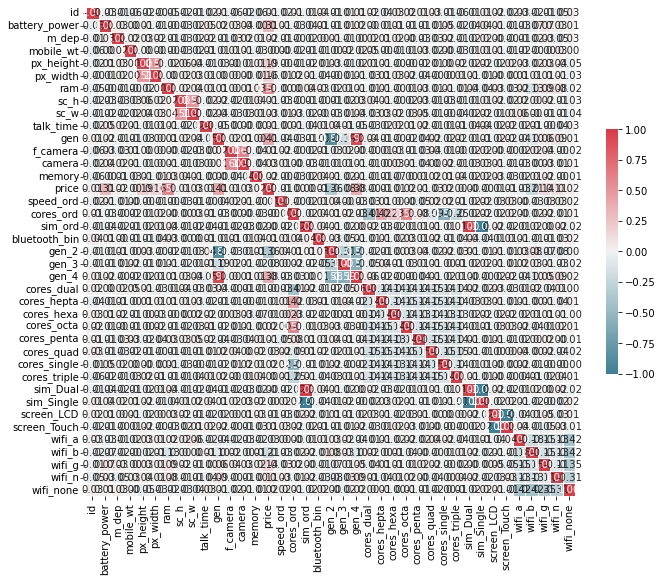

In [21]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()